<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
        Shashank Dalmia <br> 
            Ergun Acikoz <br>
            Akhil Venkatesh 
        </p></td></tr>
</table>

### Let's look at a real life example! This comes from **EEP 147 Regulation of Energy and the Environment**. 

In [28]:
ESG_table = Table.read_table('ESGPorfolios_forcsv.csv').select(
    "Group", "Group_num", "UNIT NAME", "Capacity_MW", "Total_Var_Cost_USDperMWH").sort(
    "Total_Var_Cost_USDperMWH", descending = False).relabel(4, "Average Variable Cost")

In [29]:
ESG_table

Group,Group_num,UNIT NAME,Capacity_MW,Average Variable Cost
Old Timers,7,BIG CREEK,1000,0
Fossil Light,8,HELMS,800,0.5
Fossil Light,8,DIABLO CANYON 1,1000,11.5
Bay Views,4,MOSS LANDING 6,750,32.56
Bay Views,4,MOSS LANDING 7,750,32.56
Old Timers,7,MOHAVE 1,750,34.5
Old Timers,7,MOHAVE 2,750,34.5
Big Coal,1,FOUR CORNERS,1900,36.5
Bay Views,4,MORRO BAY 3&4,665,36.61
East Bay,6,PITTSBURGH 5&6,650,36.61


This table shows some electricity generation plants in California and their costs. The Capacity is the output the firm is capable of producing. The Average Variable Cost shows the minimum variable cost per MW produced. At a price below AVC, the firm supplies nothing. At a price above the AVC, the firm can supply up to its capacity. Being a profit-maximising firm, it will try to supply its full capacity.

First, let's look at just the Big Coal producers, a portfolio of electricity producing plants, and understand the data.

In [30]:
selection = 'Big Coal'
Group = ESG_table.where("Group", selection)

In [31]:
Group

Group,Group_num,UNIT NAME,Capacity_MW,Average Variable Cost
Big Coal,1,FOUR CORNERS,1900,36.5
Big Coal,1,HUNTINGTON BEACH 1&2,300,40.5
Big Coal,1,REDONDO 5&6,350,41.94
Big Coal,1,REDONDO 7&8,950,41.94
Big Coal,1,HUNTINGTON BEACH 5,150,66.5
Big Coal,1,ALAMITOS 7,250,73.72


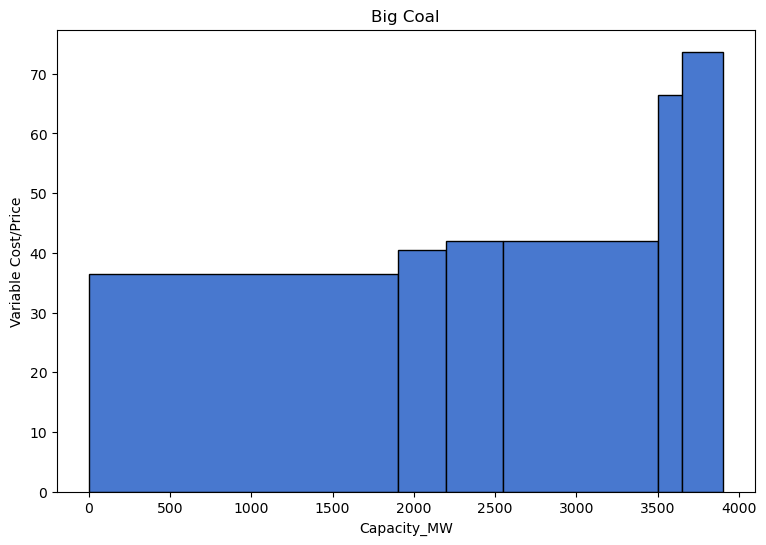

In [32]:
# Make the plot
plt.figure(figsize=(9,6))
plt.bar(new_x_group, height_group, width=width_group, edgecolor = "black")
# Add title and axis names
plt.title(selection)
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost/Price')

plt.show()

This figure is the Big Coal Supply curve. It shows the price of electricity, and the quantity supplied at those prices (which depends on Variable Cost). For example, at any Variable Cost at or above 36.5, the producer FOUR CORNERS	(the one with the lowest production costs) will supply, and so on.

Let's interact with it by changing the market price.

In [33]:
interact(group_plot, price=widgets.IntSlider(min=20,max=80,step=1,value=37));

interactive(children=(IntSlider(value=37, description='price', max=80, min=20), Output()), _dom_classes=('widg…

We are going to repeat the same process, this time for all the energy sources. They have been colored according to production group.

In [34]:
interact(ESG_plot, price=widgets.IntSlider(min=0,max=90,step=1,value=37));

interactive(children=(IntSlider(value=37, description='price', max=90), Output()), _dom_classes=('widget-inter…

### Energy manipulation for profit (In class demo)

In [35]:
def modified_profit(price, tbl):
    tbl = tbl.where("Average Variable Cost", are.below_or_equal_to(price))
    profit_per_unit = price - tbl.column("Average Variable Cost") 
    profit_per_plant = profit_per_unit * tbl.column("Capacity_MW")
    tbl = tbl.with_columns("profit_per_unit", profit_per_unit, 
                          "profit_per_plant", profit_per_plant)
    print("Price", price)
    print("Total Profit", sum(profit_per_plant))
    return tbl

In [36]:
Group

Group,Group_num,UNIT NAME,Capacity_MW,Average Variable Cost
Big Coal,1,FOUR CORNERS,1900,36.5
Big Coal,1,HUNTINGTON BEACH 1&2,300,40.5
Big Coal,1,REDONDO 5&6,350,41.94
Big Coal,1,REDONDO 7&8,950,41.94
Big Coal,1,HUNTINGTON BEACH 5,150,66.5
Big Coal,1,ALAMITOS 7,250,73.72


In [37]:
modified_profit(45, Group)

Price 45
Total Profit 21478.0


Group,Group_num,UNIT NAME,Capacity_MW,Average Variable Cost,profit_per_unit,profit_per_plant
Big Coal,1,FOUR CORNERS,1900,36.5,8.5,16150
Big Coal,1,HUNTINGTON BEACH 1&2,300,40.5,4.5,1350
Big Coal,1,REDONDO 5&6,350,41.94,3.06,1071
Big Coal,1,REDONDO 7&8,950,41.94,3.06,2907


In [38]:
Group_wo_hun = Group.take(make_array(0,2,3, 4,5))
Group_wo_hun

Group,Group_num,UNIT NAME,Capacity_MW,Average Variable Cost
Big Coal,1,FOUR CORNERS,1900,36.5
Big Coal,1,REDONDO 5&6,350,41.94
Big Coal,1,REDONDO 7&8,950,41.94
Big Coal,1,HUNTINGTON BEACH 5,150,66.5
Big Coal,1,ALAMITOS 7,250,73.72


In [39]:
interact(ESG_plot_wo_hun, price=widgets.IntSlider(min=0,max=90,step=1,value=37));

interactive(children=(IntSlider(value=37, description='price', max=90), Output()), _dom_classes=('widget-inter…

In [40]:
modified_profit(50, Group_wo_hun)

Price 50
Total Profit 36128.0


Group,Group_num,UNIT NAME,Capacity_MW,Average Variable Cost,profit_per_unit,profit_per_plant
Big Coal,1,FOUR CORNERS,1900,36.5,13.5,25650
Big Coal,1,REDONDO 5&6,350,41.94,8.06,2821
Big Coal,1,REDONDO 7&8,950,41.94,8.06,7657


In [42]:
another_firm = Table.read_table('another_firm.csv')
another_firm.show()

Output,Total Fixed Cost,Total Variable Cost
0,50,0
1,50,55
2,50,85.8
3,50,107.8
4,50,123.2
5,50,143
6,50,165
7,50,192.5
8,50,224.4
9,50,266.2


In [43]:
total_cost_v2 = another_firm.column("Total Fixed Cost") + another_firm.column("Total Variable Cost")
individual_firm_costs_v2 = another_firm.with_column("Total Cost", total_cost_v2)
average_fixed_cost_v2 = individual_firm_costs_v2.column("Total Fixed Cost") / individual_firm_costs_v2.column("Output")
average_fixed_cost_v2[0] = 0
individual_firm_costs_v2 = individual_firm_costs_v2.with_column("Average Fixed Cost", average_fixed_cost_v2)
average_variable_cost_v2 = individual_firm_costs_v2.column("Total Variable Cost")/individual_firm_costs_v2.column("Output")
average_variable_cost_v2[0] = 0
individual_firm_costs_v2 = individual_firm_costs_v2.with_column("Average Variable Cost", average_variable_cost_v2)
average_total_cost_v2 = individual_firm_costs_v2.column("Total Cost")/individual_firm_costs_v2.column("Output")
average_total_cost_v2[0] = 0
individual_firm_costs_v2 = individual_firm_costs_v2.with_column("Average Total Cost", average_total_cost_v2)
marginal_cost_v2 = np.diff(total_cost_v2)
marginal_cost_v2 = np.append(make_array(0), marginal_cost_v2)
individual_firm_costs_v2 = individual_firm_costs_v2.with_column("Marginal Cost", marginal_cost_v2)


In [44]:
individual_firm_costs_v2

Output,Total Fixed Cost,Total Variable Cost,Total Cost,Average Fixed Cost,Average Variable Cost,Average Total Cost,Marginal Cost
0,50,0,50,0,0,0,0
1,50,55,105,50,55,105,55
2,50,85.8,135.8,25,42.9,67.9,30.8
3,50,107.8,157.8,16.6667,35.9333,52.6,22
4,50,123.2,173.2,12.5,30.8,43.3,15.4
5,50,143,193,10,28.6,38.6,19.8
6,50,165,215,8.33333,27.5,35.8333,22
7,50,192.5,242.5,7.14286,27.5,34.6429,27.5
8,50,224.4,274.4,6.25,28.05,34.3,31.9
9,50,266.2,316.2,5.55556,29.5778,35.1333,41.8


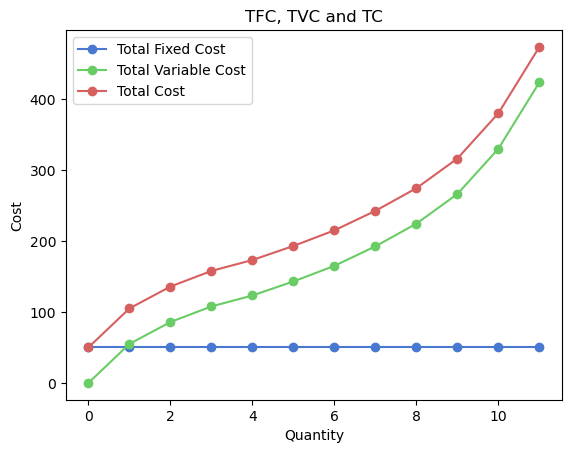

In [45]:
plt.plot(individual_firm_costs_v2.column("Output"), individual_firm_costs_v2.column("Total Fixed Cost"), marker='o')
plt.plot(individual_firm_costs_v2.column("Output"), individual_firm_costs_v2.column("Total Variable Cost"), marker='o')
plt.plot(individual_firm_costs_v2.column("Output"), individual_firm_costs_v2.column("Total Cost"), marker='o')
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('TFC, TVC and TC')
plt.legend(make_array("Total Fixed Cost","Total Variable Cost","Total Cost"))

plt.show()

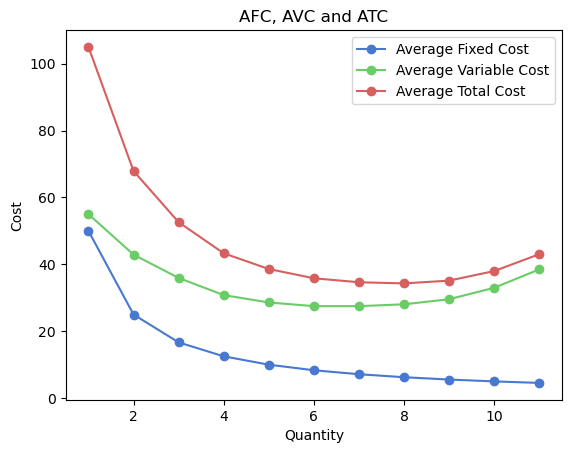

In [46]:
plt.plot(individual_firm_costs_v2.column("Output")[1:], individual_firm_costs_v2.column("Average Fixed Cost")[1:], marker='o')
plt.plot(individual_firm_costs_v2.column("Output")[1:], individual_firm_costs_v2.column("Average Variable Cost")[1:], marker='o')
plt.plot(individual_firm_costs_v2.column("Output")[1:], individual_firm_costs_v2.column("Average Total Cost")[1:], marker='o')
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('AFC, AVC and ATC')
plt.legend(make_array("Average Fixed Cost","Average Variable Cost","Average Total Cost"))

plt.show()

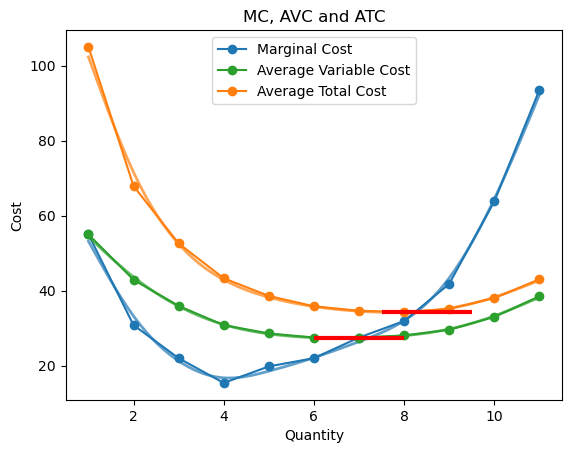

In [47]:
# You do not need to understand what the code below is doing. 
output_v2 = individual_firm_costs_v2.column("Output")[1:]
mc_v2 = individual_firm_costs_v2.column("Marginal Cost")[1:]
avc_v2 = individual_firm_costs_v2.column("Average Variable Cost")[1:]
atc_v2 = individual_firm_costs_v2.column("Average Total Cost")[1:]

sp_mc_v2 = csaps(output_v2, mc_v2, smooth=0.85)
sp_avc_v2 = csaps(output, avc_v2, smooth=0.85)
sp_atc_v2 = csaps(output, atc_v2, smooth=0.85)

output_s_v2 = np.linspace(output_v2.min(), output_v2.max(), 150)
mc_s_v2 = sp_mc_v2(output_s_v2)
avc_s_v2 = sp_avc_v2(output_s_v2)
atc_s_v2 = sp_atc_v2(output_s_v2)

plt.plot(output_v2, mc_v2, marker = 'o', color = 'tab:blue')
plt.plot(output_s_v2, mc_s_v2, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:blue')
plt.plot(output_v2, avc_v2, marker = 'o', color = 'tab:green')
plt.plot(output_s_v2, avc_s_v2, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:green')
plt.plot(output_v2, atc_v2, marker = 'o', color = 'tab:orange')
plt.plot(output_s_v2, atc_s_v2, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:orange')
plt.hlines(y=min(avc_v2), xmin = 6, xmax = 8, lw=3, color='r', zorder = 10)
plt.hlines(y=min(atc_v2), xmin = 7.5, xmax = 9.5, lw=3, color='r', zorder = 10)
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('MC, AVC and ATC')
plt.legend(make_array("Marginal Cost","Average Variable Cost","Average Total Cost"))

plt.show()

In [48]:
interact(lambda price: firm_behaviour(price, individual_firm_costs_v2), price=widgets.IntSlider(min=20,max=60,step=1,value=25));

interactive(children=(IntSlider(value=25, description='price', max=60, min=20), Output()), _dom_classes=('widg…

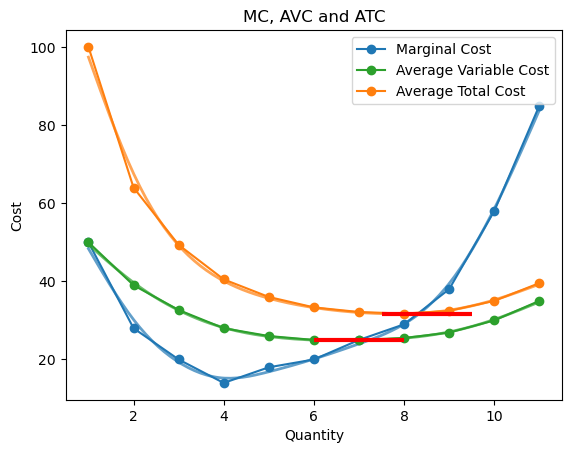

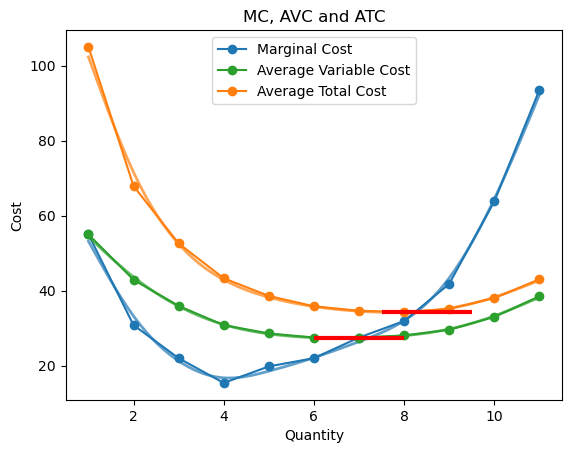

In [49]:
output = individual_firm_costs.column("Output")[1:]
mc = individual_firm_costs.column("Marginal Cost")[1:]
avc = individual_firm_costs.column("Average Variable Cost")[1:]
atc = individual_firm_costs.column("Average Total Cost")[1:]

sp_mc = csaps(output, mc, smooth=0.85)
sp_avc = csaps(output, avc, smooth=0.85)
sp_atc = csaps(output, atc, smooth=0.85)

output_s = np.linspace(output.min(), output.max(), 150)
mc_s = sp_mc(output_s)
avc_s = sp_avc(output_s)
atc_s = sp_atc(output_s)

plt.plot(output, mc, marker = 'o', color = 'tab:blue')
plt.plot(output_s, mc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:blue')
plt.plot(output, avc, marker = 'o', color = 'tab:green')
plt.plot(output_s, avc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:green')
plt.plot(output, atc, marker = 'o', color = 'tab:orange')
plt.plot(output_s, atc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:orange')
plt.hlines(y=min(avc), xmin = 6, xmax = 8, lw=3, color='r', zorder = 10)
plt.hlines(y=min(atc), xmin = 7.5, xmax = 9.5, lw=3, color='r', zorder = 10)
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('MC, AVC and ATC')
plt.legend(make_array("Marginal Cost","Average Variable Cost","Average Total Cost"))

plt.show()

output_v2 = individual_firm_costs_v2.column("Output")[1:]
mc_v2 = individual_firm_costs_v2.column("Marginal Cost")[1:]
avc_v2 = individual_firm_costs_v2.column("Average Variable Cost")[1:]
atc_v2 = individual_firm_costs_v2.column("Average Total Cost")[1:]

sp_mc_v2 = csaps(output_v2, mc_v2, smooth=0.85)
sp_avc_v2 = csaps(output, avc_v2, smooth=0.85)
sp_atc_v2 = csaps(output, atc_v2, smooth=0.85)

output_s_v2 = np.linspace(output_v2.min(), output_v2.max(), 150)
mc_s_v2 = sp_mc_v2(output_s_v2)
avc_s_v2 = sp_avc_v2(output_s_v2)
atc_s_v2 = sp_atc_v2(output_s_v2)

plt.plot(output_v2, mc_v2, marker = 'o', color = 'tab:blue')
plt.plot(output_s_v2, mc_s_v2, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:blue')
plt.plot(output_v2, avc_v2, marker = 'o', color = 'tab:green')
plt.plot(output_s_v2, avc_s_v2, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:green')
plt.plot(output_v2, atc_v2, marker = 'o', color = 'tab:orange')
plt.plot(output_s_v2, atc_s_v2, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:orange')
plt.hlines(y=min(avc_v2), xmin = 6, xmax = 8, lw=3, color='r', zorder = 10)
plt.hlines(y=min(atc_v2), xmin = 7.5, xmax = 9.5, lw=3, color='r', zorder = 10)
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('MC, AVC and ATC')
plt.legend(make_array("Marginal Cost","Average Variable Cost","Average Total Cost"))

plt.show()